# 120.LeNet-5 (1998, Yan LeCunn)

# 실습 : fashion MNIST 를 이용하여 위와 동일한 작업

Label	Class  
0	T-shirt/top  
1	Trouser  
2	Pullover  
3	Dress  
4	Coat  
5	Sandal  
6	Shirt  
7	Sneaker  
8	Bag  
9	Ankle boot

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, \
                Activation, Conv2D, MaxPooling2D, Flatten

np.random.seed(102)

In [2]:
(train_images, train_labels), (test_images, test_labels) = \
                tf.keras.datasets.fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

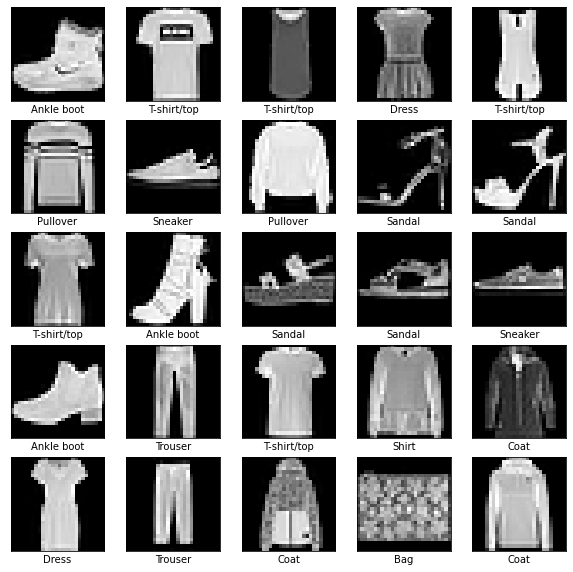

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])

In [5]:
X_train_scaled = train_images / 255.0
X_test_scaled = test_images / 255.0

In [6]:
# Conv2D layer 의  입력 사양에 맞추어 3 dimension 으로 차원 증가
X_train = np.expand_dims(X_train_scaled, axis=3)
X_test = np.expand_dims(X_test_scaled, axis=3)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
# label 을 one-hot-encoding
y_train_onehot = tf.keras.utils.to_categorical(train_labels)
y_test_onehot = tf.keras.utils.to_categorical(test_labels)

In [8]:
# tf.data 를 이용한 shuffling and batch 구성
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train_onehot))\
                    .shuffle(10000).batch(128)
test_ds  = tf.data.Dataset.from_tensor_slices((X_test, y_test_onehot)).batch(128)

In [12]:
# LeNet model 구성
# Layer 추가, kernel_size = 3
model = tf.keras.Sequential()
model.add(Conv2D(6, kernel_size=3, padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Conv2D(16, kernel_size=3, padding="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Conv2D(32, kernel_size=3, padding="valid"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Flatten())

model.add(Dense(120))
model.add(Activation("relu"))

model.add(Dense(84))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 activation_4 (Activation)   (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        880       
                                                                 
 activation_5 (Activation)   (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                  

In [14]:
# model compile and predict
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

history = model.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
469/469 [==============================] - 13s 5ms/step - loss: 0.7367 - accuracy: 0.7285 - val_loss: 0.5256 - val_accuracy: 0.8104
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4596 - accuracy: 0.8333 - val_loss: 0.4479 - val_accuracy: 0.8370
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3988 - accuracy: 0.8555 - val_loss: 0.3974 - val_accuracy: 0.8583
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3631 - accuracy: 0.8688 - val_loss: 0.3623 - val_accuracy: 0.8705
Epoch 5/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3367 - accuracy: 0.8769 - val_loss: 0.3701 - val_accuracy: 0.8656


Test Score  0.3701229691505432
Test Accuracy  0.8655999898910522


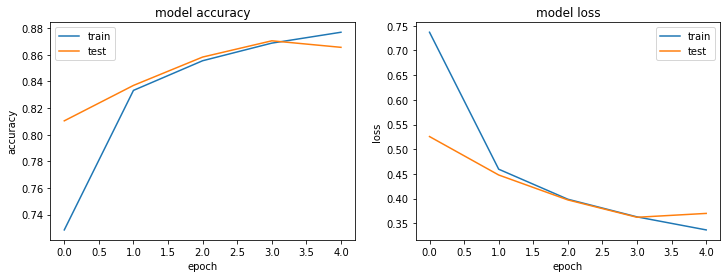

In [15]:
# train history 시각화
score = model.evaluate(test_ds, verbose=0)
print("Test Score ", score[0])
print("Test Accuracy ", score[1])

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])

Test Accuracy : 0.8656


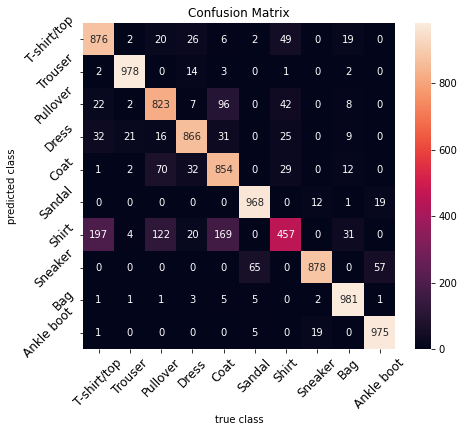

In [16]:
# confusion matrix 시각화
y_pred = model.predict(X_test).argmax(axis=1)

from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

plt.figure(figsize=(7,6))

ax = sns.heatmap(confusion_matrix(test_labels, y_pred), annot=True, fmt='d')

ax.set_xticklabels(class_names, rotation=45, fontsize=12)
ax.set_yticklabels(class_names, rotation=45, fontsize=12)
ax.set_xlabel("true class")
ax.set_ylabel("predicted class")
ax.set_title('Confusion Matrix')
print('Test Accuracy :', accuracy_score(test_labels, y_pred))